In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./clean_processed_tweet_data.csv")

In [3]:
Clean_Tweet = df[['original_text','polarity']]

In [4]:
def text_category (p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

<ipython-input-5-ac2e879d87c2>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
<ipython-input-5-ac2e879d87c2>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


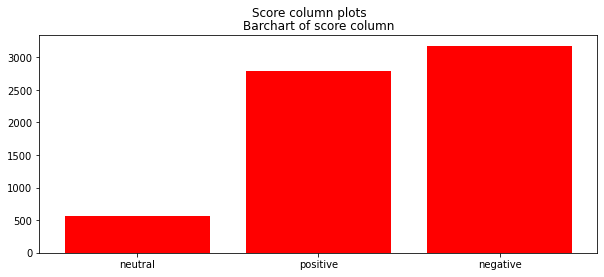

In [5]:
score = pd.Series([text_category(val) for val in Clean_Tweet['polarity']])
Clean_Tweet = pd.concat([Clean_Tweet, score.rename("score")], axis=1)

labels = ['neutral', 'positive', 'negative']
positive = len(Clean_Tweet[Clean_Tweet['score'] == "positive"])
negative = len(Clean_Tweet[Clean_Tweet['score'] == "negative"])
neutral = len(Clean_Tweet[Clean_Tweet['score'] == "neutral"])


fig, ax = plt.subplots(1, 1, figsize = (10,4))


ax.bar(x=labels, height=[negative, positive, neutral], color='red')
ax.set_title('Barchart of score column')
ax.set_xticklabels(labels)


fig.suptitle('Score column plots')


fig.show()

In [6]:
Clean_Tweet = Clean_Tweet.drop(Clean_Tweet[Clean_Tweet.score == 'neutral'].index)
scoremap = pd.Series([1 if val == 'positive' else 0 for val in Clean_Tweet['score']])
Clean_Tweet['scoremap'] = scoremap

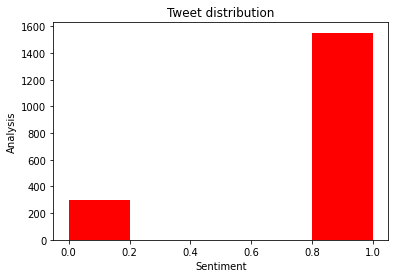

In [7]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(Clean_Tweet['scoremap'],bins = 5,color='red')
plt.title('Tweet distribution')
plt.xlabel('Sentiment')
plt.ylabel('Analysis')
plt.show()

In [8]:
import re
import string
import spacy
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns

/home/bethelhem/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [9]:
Clean_Tweet['original_text']=Clean_Tweet['original_text'].astype(str)
Clean_Tweet['original_text'] = Clean_Tweet['original_text'].apply(lambda x: x.lower())
Clean_Tweet['original_text']= Clean_Tweet['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from nltk.corpus import stopwords
import nltk
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel


/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bethelhem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
Clean_Tweet['original_text']=Clean_Tweet['original_text'].apply(remove_stopwords)

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
text_list=Clean_Tweet['original_text'].tolist()
tokenized_reviews = lemmatization(text_list)

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=500, passes=50,iterations=100)

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
lda_model.print_topics()

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.044*"vaccine" + 0.030*"case" + 0.030*"africa" + 0.030*"world" + 0.026*"covid19" + 0.026*"coronavirus" + 0.025*"oxygen" + 0.023*"amp" + 0.022*"death" + 0.018*"week"'),
 (1,
  '0.080*"vaccine" + 0.054*"covid19" + 0.033*"amp" + 0.019*"world" + 0.015*"safe" + 0.015*"support" + 0.014*"people" + 0.013*"risk" + 0.012*"government" + 0.011*"safety"'),
 (2,
  '0.064*"vaccine" + 0.049*"covid19" + 0.034*"dose" + 0.034*"vaccination" + 0.034*"ontario" + 0.034*"today" + 0.032*"india" + 0.027*"way" + 0.017*"2nd" + 0.017*"world"'),
 (3,
  '0.061*"vaccine" + 0.049*"covid19" + 0.024*"variant" + 0.019*"dose" + 0.019*"south" + 0.016*"africa" + 0.016*"delta" + 0.014*"wave" + 0.014*"people" + 0.014*"place"'),
 (4,
  '0.100*"vaccine" + 0.077*"africa" + 0.034*"public" + 0.028*"health" + 0.027*"good" + 0.025*"technology" + 0.025*"production" + 0.024*"leader" + 0.024*"patent" + 0.024*"expert"')]

In [19]:
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
LDAvis_prepared

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.274772 -0.156321       1        1  24.495925
1     -0.082191  0.137626       2        1  21.638177
3      0.004433  0.122795       3        1  19.783544
0      0.029293  0.118001       4        1  18.691141
4     -0.226307 -0.222102       5        1  15.391213, topic_info=            Term         Freq        Total Category  logprob  loglift
0         africa  1240.000000  1240.000000  Default  30.0000  30.0000
334  vaccination   436.000000   436.000000  Default  29.0000  29.0000
373      ontario   436.000000   436.000000  Default  28.0000  28.0000
41         today   436.000000   436.000000  Default  27.0000  27.0000
129        india   409.000000   409.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
115          day   113.060769   391.242003   Topic5  -4.2659   0.6300
307         free    66.270710   112.122268   Topic5  -4.8001   1.3455
87    government    78.514313   213.510128   Topic5  -4.6305   0.8710
58       covid19   148.435804  2147.020417   Topic5  -3.9937  -0.8003
199       people    75.967490   470.854044   Topic5  -4.6635   0.0471

[260 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2516      2  0.989789     21st
257       1  0.996148      2nd
126       1  0.992132   action
411       2  0.994045  adverse
0         1  0.132241   africa
...     ...       ...      ...
193       2  0.298086    world
193       4  0.402070    world
437       2  0.993847    young
82        1  0.993931      zip
83        1  0.989813        📱

[271 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1, 5])

In [20]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000)) 
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/bethelhem/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -5.438309779903436

Coherence Score:  0.435861087866523
